In [2]:
import pandas as pd
import numpy as np
import math
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
! pwd
! ls

/Users/alyulina/Projects/Kondrashov/Sandpiper/h=sigm/ver22/Rai's
RNS_input.txt           err_100_v14.png         err_1_dfe_0.1_1e-6.png
err_0.1.png             err_10_v14.png          err_1_dfe_0.1_5e-7.png
err_0.1_v14.png         err_1_dfe_0.01_0.png    err_1_v14.png
err_1.png               err_1_dfe_0.01_1e-6.png notebook-ver22.ipynb
err_10.png              err_1_dfe_0.01_5e-7.png out
err_100.png             err_1_dfe_0.1_0.png     to_run.png


In [4]:
mu = [-0.0500000000000000, -0.0372751426827093, -0.0277887252403267, -0.0207165739660756, -0.0154442650096474, -0.0115137436372836, -0.0085835287378376, -0.0063990451684807, -0.0047705064337644, -0.0035564261597470, -0.0026513258509018, -0.0019765709878144, -0.0014735393118657, -0.0010985277619675, -0.0008189555813651, -0.0006105337229237, -0.0004551546326917, -0.0003393190775256, -0.0002529633405947, -0.0001885848922832, -0.0001405905753532, -0.0001048106751227, -0.0000781366573974, -0.0000582511010648, -0.0000434263620723, -0.0000323744768487, -0.0000241352648763, -0.0000179929088390, -0.0000134137648850, -0.0000100000000000]
sigma = [0.0000100000000000, 0.0000134137648850, 0.0000179929088390, 0.0000241352648763, 0.0000323744768487, 0.0000434263620723, 0.0000582511010648, 0.0000781366573974, 0.0001048106751227, 0.0001405905753532, 0.0001885848922832, 0.0002529633405947, 0.0003393190775256, 0.0004551546326917, 0.0006105337229237, 0.0008189555813651, 0.0010985277619675, 0.0014735393118657, 0.0019765709878144, 0.0026513258509018, 0.0035564261597470, 0.0047705064337644, 0.0063990451684807, 0.0085835287378376, 0.0115137436372836, 0.0154442650096474, 0.0207165739660756, 0.0277887252403267, 0.0372751426827093, 0.0500000000000000]
alpha = [0, -2, -4]
beta = [0, 1000, 3000, 5000, 7000]

In [5]:
# taking every third mu and sigma
mu_sigma = ['{:.10f}'.format(i) + ' ' + '{:.10f}'.format(j) for i in mu for j in sigma]
mu_sigma_reduced = ['{:.10f}'.format(i) + ' ' + '{:.10f}'.format(j) for i in mu[::3] for j in sigma[::3]]

In [6]:
# taking alpha = 0 and alpha = -2
alpha_beta = ['{:.0f}'.format(i) + ' ' + '{:.0f}'.format(j) for i in alpha for j in beta]
alpha_beta_reduced = ['{:.0f}'.format(i) + ' ' + '{:.0f}'.format(j) for i in alpha[:-1] for j in beta]

In [7]:
# rns_pd = pd.read_excel("/Users/alyulina/Projects/Kondrashov/Sandpiper/h=sigm/ver21/Rai's/Expected polymorphisms.xlsx", sheet_name="Newest (redneck)")
# rns_parsed = ['{:.10f}'.format(x[2]) + ' ' + '{:.10f}'.format(x[3]) + ' ' + '{:.1f}'.format(x[4]) + ' ' + '{:.0f}'.format(x[5]) + ' ' + '{:.12f}'.format(x[10]) + '\n' for x in rns_pd.values.tolist()[2:]]

In [8]:
# ALSO HAVE VER14 NUMBERS - check that this is the right file
# comment and rerun the cell above if need 1-1/2N

rns_pd = pd.read_excel("/Users/alyulina/Projects/Kondrashov/Sandpiper/h=sigm/ver14/Rai's/Expected polymorphisms.xlsx", sheet_name="Last stint")
rns_parsed = ['{:.10f}'.format(x[0]) + ' ' + '{:.10f}'.format(x[1]) + ' ' + '{:.1f}'.format(x[2]) + ' ' + '{:.0f}'.format(x[3]) + ' ' + '{:.12f}'.format(x[4]) + '\n' for x in rns_pd.values.tolist()]

In [9]:
# also leaving alpha = -4
rns_parsed_filtered = [x for x in rns_parsed if (' '.join(x.split()[:2]) in mu_sigma_reduced) and ('-4.0' not in x)]
rns_parsed_split = [list(map(float, x.split())) for x in rns_parsed_filtered]

In [10]:
# mu and sigma are x100 and b is x0.01 for the rns – now Fedya does this inside the code
rns_input = [' ' + '{:.10f}'.format(x[0]) + # mu 
             ' ' + '{:.10f}'.format(x[1]) + # sigma
             ' ' + '{:.1f}'.format(x[2]) + 
             ' ' + '{:.0f}'.format(x[3]) + # beta
             ' /nfs/scistore08/kondrgrp/alyulina/sandpiper/dynamics/h=sigm/ver22/rai/rns/RNSv22' + 
             '_mu=' + '{:.10f}'.format(x[0]) + 
             '_sigma=' + '{:.10f}'.format(x[1]) + 
             '_alpha=' + '{:.1f}'.format(x[2]) + 
             '_beta=' + '{:.0f}'.format(x[3]) + 
             '.txt\n' for x in rns_parsed_split]

In [ ]:
# with open("/Users/alyulina/Projects/Kondrashov/Sandpiper/h=sigm/ver22/Rai's/RNS_input.txt", 'w+') as f:
#    f.writelines(rns_input)

In [29]:
# dictionary with Rai's output
rns_parsed_filtered_dict = dict(zip([' '.join(x.split()[:-1]) for x in rns_parsed_filtered], [float(x.split()[-1]) for x in rns_parsed_filtered]))
# dictionary with Rai's output
rns_parsed_dict = dict(zip([' '.join(x.split()[:-1]) for x in rns_parsed], [float(x.split()[-1]) for x in rns_parsed]))

In [12]:
# concatenating all erors
err = []

for i in range(len(alpha_beta_reduced)):
    with open('out/rns_points_rns_pols_alpha=' + '{:.1f}'.format(float(alpha_beta_reduced[i].split()[0])) + '_beta=' + alpha_beta_reduced[i].split()[1] + '.txt') as f:
        lines = [x.replace('*10^', 'e').split() for x in f.readlines() if 'nan' not in x]
        
    err.extend([abs(float(x[-1]) - rns_parsed_filtered_dict.get(' '.join(x[:-1]))) / rns_parsed_filtered_dict.get(' '.join(x[:-1])) for x in lines])

In [13]:
# reading dfe area calculations
dfe_area_0_4N = pd.read_csv("/Users/alyulina/Projects/Kondrashov/Sandpiper/h=sigm/ver22/dfe_area_5e-7-inf_alpha=0.csv", header=None)
dfe_area_0_4N_keys = ['{:.16f}'.format(float(item.replace('*^', 'e').replace('{', '').replace('}', '').replace(',', '').split()[0])) + ' '
                   + '{:.16f}'.format(float(item.replace('*^', 'e').replace('{', '').replace('}', '').replace(',', '').split()[1])) + ' '
                   + '{:.0f}'.format(float(item.replace('*^', 'e').replace('{', '').replace('}', '').replace(',', '').split()[2])) 
                   for sublist in dfe_area_0_4N.values.tolist() for item in sublist]
dfe_area_0_4N_values = [round(float(item.replace('*^', 'e').replace('{', '').replace('}', '').replace(',', '').split()[-1]), 2) for sublist in dfe_area_0_4N.values.tolist() for item in sublist]
dfe_area_0_4N_dict = dict(zip(dfe_area_0_4N_keys, dfe_area_0_4N_values))

dfe_area_2_4N = pd.read_csv("/Users/alyulina/Projects/Kondrashov/Sandpiper/h=sigm/ver22/dfe_area_5e-7-inf_alpha=-2.csv", header=None)
dfe_area_2_4N_keys = ['{:.16f}'.format(float(item.replace('*^', 'e').replace('{', '').replace('}', '').replace(',', '').split()[0])) + ' '
                   + '{:.16f}'.format(float(item.replace('*^', 'e').replace('{', '').replace('}', '').replace(',', '').split()[1])) + ' '
                   + '{:.0f}'.format(float(item.replace('*^', 'e').replace('{', '').replace('}', '').replace(',', '').split()[2])) 
                   for sublist in dfe_area_2_4N.values.tolist() for item in sublist]
dfe_area_2_4N_values = [round(float(item.replace('*^', 'e').replace('{', '').replace('}', '').replace(',', '').split()[-1]), 2) for sublist in dfe_area_2_4N.values.tolist() for item in sublist]
dfe_area_2_4N_dict = dict(zip(dfe_area_2_4N_keys, dfe_area_2_4N_values))

mu_sigma_area_0_4N = [[i, j, dfe_area_0_4N_dict.get('{:.16f}'.format(i) + ' ' + '{:.16f}'.format(j) + ' 0')] for i in mu for j in sigma]
mu_sigma_area_2_4N = [[i, j, dfe_area_2_4N_dict.get('{:.16f}'.format(i) + ' ' + '{:.16f}'.format(j) + ' -2')] for i in mu for j in sigma]

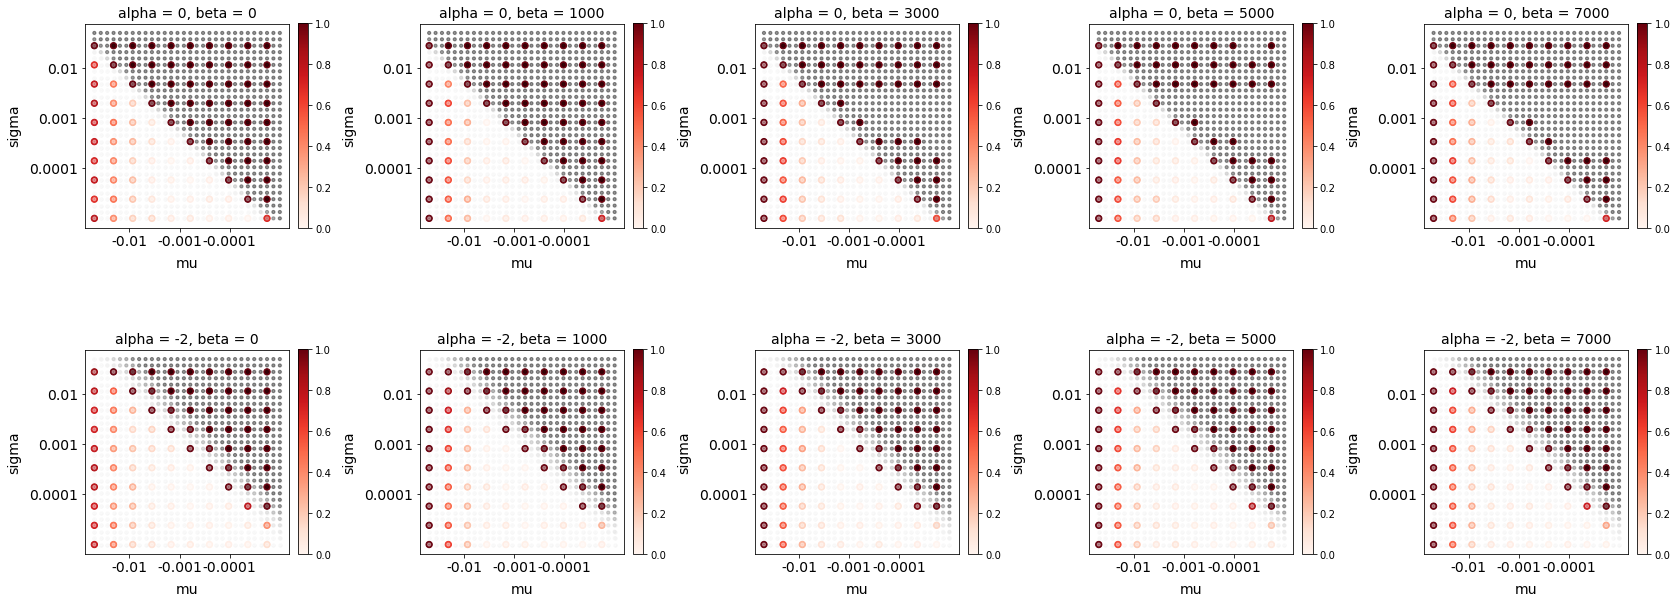

In [14]:
plt.figure(figsize=(28, 12))

plt.subplots_adjust(wspace=0.5, hspace=0)

for i in range(len(alpha_beta_reduced)):
    
    with open('out/rns_points_rns_pols_alpha=' + '{:.1f}'.format(float(alpha_beta_reduced[i].split()[0])) + '_beta=' + alpha_beta_reduced[i].split()[1] + '.txt') as f:
        lines = [x.replace('*10^', 'e').split() for x in f.readlines() if 'nan' not in x]
    
    mu_i = [-np.log(abs(float(x[0]))) for x in lines] # mu on log scale
    sigma_i = [np.log(float(x[1])) for x in lines] # sigma on log scale
    err_i = [abs(float(x[-1]) - rns_parsed_filtered_dict.get(' '.join(x[:-1]))) / rns_parsed_filtered_dict.get(' '.join(x[:-1])) for x in lines]
    # print(max(err_i))
    
    plt.subplot(len(alpha) - 1, len(beta), i + 1)

    # all points where Rai calculated hets
    plt.scatter([-np.log(abs(float(x.split()[0]))) for x in mu_sigma], [np.log(float(x.split()[1])) for x in mu_sigma], c='#f5f5f5', s=10)
    # points for which we have Fedya's code output
    plt.scatter(mu_i, sigma_i, c=err_i, cmap='Reds', norm = matplotlib.colors.Normalize(vmin=0, vmax=1), s=40)

    plt.colorbar(fraction=0.046, pad=0.04)
    
    if alpha_beta_reduced[i].split()[0] == '0':
        plt.scatter([-np.log(abs(float(x[0]))) for x in mu_sigma_area_0_4N], [np.log(float(x[1])) for x in mu_sigma_area_0_4N], c=[float(x[2]) for x in mu_sigma_area_0_4N], cmap='Greys', norm = matplotlib.colors.Normalize(vmin=0, vmax=0.1), s=10, alpha=0.4)
    elif alpha_beta_reduced[i].split()[0] == '-2':
        plt.scatter([-np.log(abs(float(x[0]))) for x in mu_sigma_area_2_4N], [np.log(float(x[1])) for x in mu_sigma_area_2_4N], c=[float(x[2]) for x in mu_sigma_area_2_4N], cmap='Greys', norm = matplotlib.colors.Normalize(vmin=0, vmax=0.1), s=10, alpha=0.4)
    
    plt.yticks([np.log(0.01), np.log(0.001), np.log(0.0001)], [0.01, 0.001, 0.0001], fontsize=14)
    plt.xticks([-np.log(abs(-0.01)), -np.log(abs(-0.001)), -np.log(abs(-0.0001))], [-0.01, -0.001, -0.0001], fontsize=14)

    plt.xlabel('mu', labelpad=8, fontsize=14);
    plt.ylabel('sigma', labelpad=8, fontsize=14);
    plt.title('alpha = ' + alpha_beta_reduced[i].split()[0] + ', beta = ' + alpha_beta_reduced[i].split()[1], fontsize=14)
    
    plt.gca().set_aspect('equal')

    
# plt.savefig('err_1_dfe_0.1_5e-7.png', dpi=300, bbox_inches='tight')
# plt.savefig('err_1_dfe_0.01_5e-7.png', dpi=300, bbox_inches='tight')


In [50]:
# now with a different cut-off
# reading dfe area calculations
dfe_area_0_2N = pd.read_csv("/Users/alyulina/Projects/Kondrashov/Sandpiper/h=sigm/ver22/dfe_area_1e-6-inf_alpha=0.csv", header=None)
dfe_area_0_2N_keys = ['{:.16f}'.format(float(item.replace('*^', 'e').replace('{', '').replace('}', '').replace(',', '').split()[0])) + ' '
                   + '{:.16f}'.format(float(item.replace('*^', 'e').replace('{', '').replace('}', '').replace(',', '').split()[1])) + ' '
                   + '{:.0f}'.format(float(item.replace('*^', 'e').replace('{', '').replace('}', '').replace(',', '').split()[2])) 
                   for sublist in dfe_area_0_2N.values.tolist() for item in sublist]
dfe_area_0_2N_values = [round(float(item.replace('*^', 'e').replace('{', '').replace('}', '').replace(',', '').split()[-1]), 2) for sublist in dfe_area_0_2N.values.tolist() for item in sublist]
dfe_area_0_2N_dict = dict(zip(dfe_area_0_2N_keys, dfe_area_0_2N_values))

dfe_area_2_2N = pd.read_csv("/Users/alyulina/Projects/Kondrashov/Sandpiper/h=sigm/ver22/dfe_area_1e-6-inf_alpha=-2.csv", header=None)
dfe_area_2_2N_keys = ['{:.16f}'.format(float(item.replace('*^', 'e').replace('{', '').replace('}', '').replace(',', '').split()[0])) + ' '
                   + '{:.16f}'.format(float(item.replace('*^', 'e').replace('{', '').replace('}', '').replace(',', '').split()[1])) + ' '
                   + '{:.0f}'.format(float(item.replace('*^', 'e').replace('{', '').replace('}', '').replace(',', '').split()[2])) 
                   for sublist in dfe_area_2_2N.values.tolist() for item in sublist]
dfe_area_2_2N_values = [round(float(item.replace('*^', 'e').replace('{', '').replace('}', '').replace(',', '').split()[-1]), 2) for sublist in dfe_area_2_2N.values.tolist() for item in sublist]
dfe_area_2_2N_dict = dict(zip(dfe_area_2_2N_keys, dfe_area_2_2N_values))

dfe_area_4_2N = pd.read_csv("/Users/alyulina/Projects/Kondrashov/Sandpiper/h=sigm/ver22/dfe_area_1e-6-inf_alpha=-4.csv", header=None)
dfe_area_4_2N_keys = ['{:.16f}'.format(float(item.replace('*^', 'e').replace('{', '').replace('}', '').replace(',', '').split()[0])) + ' '
                   + '{:.16f}'.format(float(item.replace('*^', 'e').replace('{', '').replace('}', '').replace(',', '').split()[1])) + ' '
                   + '{:.0f}'.format(float(item.replace('*^', 'e').replace('{', '').replace('}', '').replace(',', '').split()[2])) 
                   for sublist in dfe_area_4_2N.values.tolist() for item in sublist]
dfe_area_4_2N_values = [round(float(item.replace('*^', 'e').replace('{', '').replace('}', '').replace(',', '').split()[-1]), 2) for sublist in dfe_area_4_2N.values.tolist() for item in sublist]
dfe_area_4_2N_dict = dict(zip(dfe_area_4_2N_keys, dfe_area_4_2N_values))


mu_sigma_area_0_2N = [[i, j, dfe_area_0_2N_dict.get('{:.16f}'.format(i) + ' ' + '{:.16f}'.format(j) + ' 0')] for i in mu for j in sigma]
mu_sigma_area_2_2N = [[i, j, dfe_area_2_2N_dict.get('{:.16f}'.format(i) + ' ' + '{:.16f}'.format(j) + ' -2')] for i in mu for j in sigma]
mu_sigma_area_4_2N = [[i, j, dfe_area_4_2N_dict.get('{:.16f}'.format(i) + ' ' + '{:.16f}'.format(j) + ' -4')] for i in mu for j in sigma]

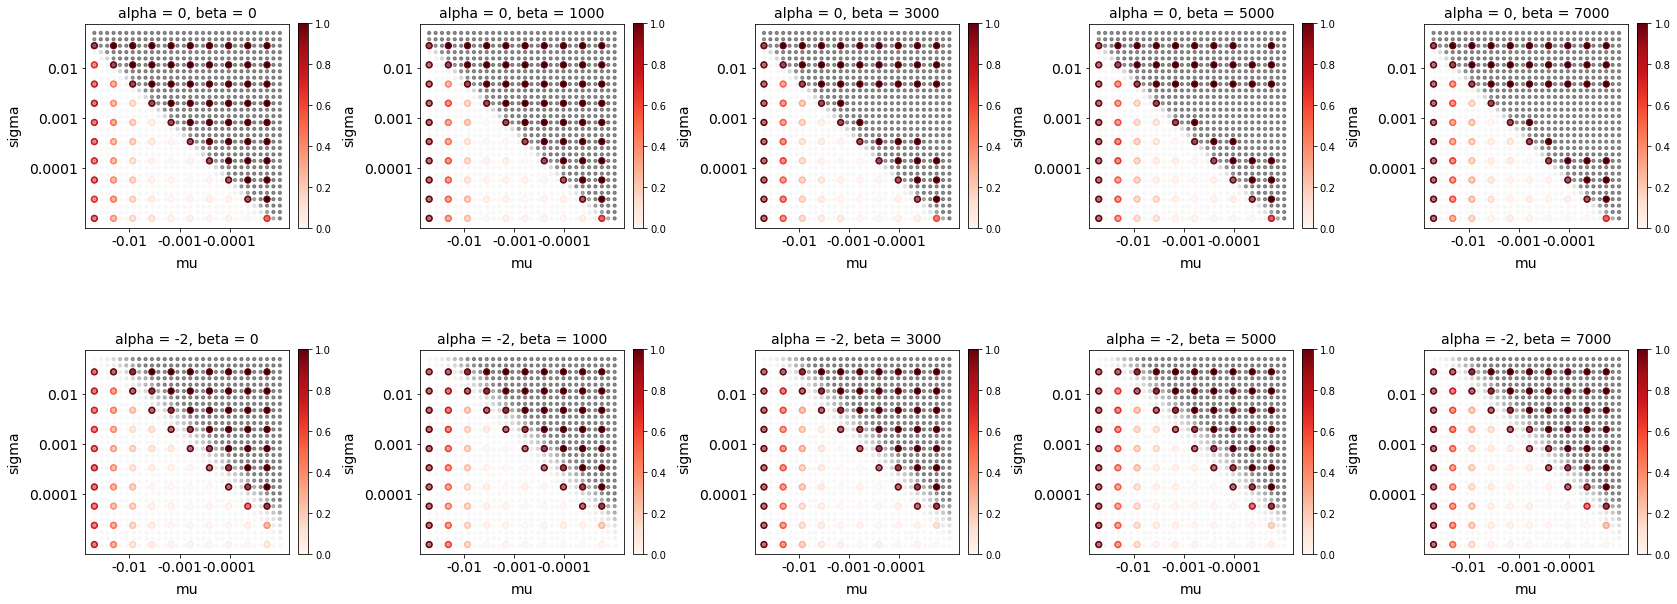

In [17]:
plt.figure(figsize=(28, 12))

plt.subplots_adjust(wspace=0.5, hspace=0)

for i in range(len(alpha_beta_reduced)):
    
    with open('out/rns_points_rns_pols_alpha=' + '{:.1f}'.format(float(alpha_beta_reduced[i].split()[0])) + '_beta=' + alpha_beta_reduced[i].split()[1] + '.txt') as f:
        lines = [x.replace('*10^', 'e').split() for x in f.readlines() if 'nan' not in x]
    
    mu_i = [-np.log(abs(float(x[0]))) for x in lines] # mu on log scale
    sigma_i = [np.log(float(x[1])) for x in lines] # sigma on log scale
    err_i = [abs(float(x[-1]) - rns_parsed_filtered_dict.get(' '.join(x[:-1]))) / rns_parsed_filtered_dict.get(' '.join(x[:-1])) for x in lines]
    # print(max(err_i))
    
    plt.subplot(len(alpha) - 1, len(beta), i + 1)

    # all points where Rai calculated hets
    plt.scatter([-np.log(abs(float(x.split()[0]))) for x in mu_sigma], [np.log(float(x.split()[1])) for x in mu_sigma], c='#f5f5f5', s=10)
    # points for which we have Fedya's code output
    plt.scatter(mu_i, sigma_i, c=err_i, cmap='Reds', norm = matplotlib.colors.Normalize(vmin=0, vmax=1), s=40)

    plt.colorbar(fraction=0.046, pad=0.04)
    
    if alpha_beta_reduced[i].split()[0] == '0':
        plt.scatter([-np.log(abs(float(x[0]))) for x in mu_sigma_area_0_2N], [np.log(float(x[1])) for x in mu_sigma_area_0_2N], c=[float(x[2]) for x in mu_sigma_area_0_2N], cmap='Greys', norm = matplotlib.colors.Normalize(vmin=0, vmax=0.1), s=10, alpha=0.4)
    elif alpha_beta_reduced[i].split()[0] == '-2':
        plt.scatter([-np.log(abs(float(x[0]))) for x in mu_sigma_area_2_2N], [np.log(float(x[1])) for x in mu_sigma_area_2_2N], c=[float(x[2]) for x in mu_sigma_area_2_2N], cmap='Greys', norm = matplotlib.colors.Normalize(vmin=0, vmax=0.1), s=10, alpha=0.4)
    
    plt.yticks([np.log(0.01), np.log(0.001), np.log(0.0001)], [0.01, 0.001, 0.0001], fontsize=14)
    plt.xticks([-np.log(abs(-0.01)), -np.log(abs(-0.001)), -np.log(abs(-0.0001))], [-0.01, -0.001, -0.0001], fontsize=14)

    plt.xlabel('mu', labelpad=8, fontsize=14);
    plt.ylabel('sigma', labelpad=8, fontsize=14);
    plt.title('alpha = ' + alpha_beta_reduced[i].split()[0] + ', beta = ' + alpha_beta_reduced[i].split()[1], fontsize=14)
    
    plt.gca().set_aspect('equal')

# plt.savefig('err_1_dfe_0.01_1e-6.png', dpi=300, bbox_inches='tight')
# plt.savefig('err_1_dfe_0.1_1e-6.png', dpi=300, bbox_inches='tight')

In [75]:
# now with a different cut-off
# reading dfe area calculations

# ROUNDING TURNS OUT TO BE IMPORTANT; I USED 2 TO GENERATE POINTS WHERE TO RUN FEDYA'S CODE AND 4 TO CHOSE WHICH (RAI'S / FEDYA'S) POINTS TO USE

dfe_area_0_0 = pd.read_csv("/Users/alyulina/Projects/Kondrashov/Sandpiper/h=sigm/ver22/dfe_area_0-inf_alpha=0.csv", header=None)
dfe_area_0_0_keys = ['{:.16f}'.format(float(item.replace('*^', 'e').replace('{', '').replace('}', '').replace(',', '').split()[0])) + ' '
                   + '{:.16f}'.format(float(item.replace('*^', 'e').replace('{', '').replace('}', '').replace(',', '').split()[1])) + ' '
                   + '{:.0f}'.format(float(item.replace('*^', 'e').replace('{', '').replace('}', '').replace(',', '').split()[2])) 
                   for sublist in dfe_area_0_0.values.tolist() for item in sublist]
dfe_area_0_0_values = [round(float(item.replace('*^', 'e').replace('{', '').replace('}', '').replace(',', '').split()[-1]), 2) for sublist in dfe_area_0_0.values.tolist() for item in sublist]
dfe_area_0_0_dict = dict(zip(dfe_area_0_0_keys, dfe_area_0_0_values))

dfe_area_2_0 = pd.read_csv("/Users/alyulina/Projects/Kondrashov/Sandpiper/h=sigm/ver22/dfe_area_0-inf_alpha=-2.csv", header=None)
dfe_area_2_0_keys = ['{:.16f}'.format(float(item.replace('*^', 'e').replace('{', '').replace('}', '').replace(',', '').split()[0])) + ' '
                   + '{:.16f}'.format(float(item.replace('*^', 'e').replace('{', '').replace('}', '').replace(',', '').split()[1])) + ' '
                   + '{:.0f}'.format(float(item.replace('*^', 'e').replace('{', '').replace('}', '').replace(',', '').split()[2])) 
                   for sublist in dfe_area_2_0.values.tolist() for item in sublist]
dfe_area_2_0_values = [round(float(item.replace('*^', 'e').replace('{', '').replace('}', '').replace(',', '').split()[-1]), 2) for sublist in dfe_area_2_0.values.tolist() for item in sublist]
dfe_area_2_0_dict = dict(zip(dfe_area_2_0_keys, dfe_area_2_0_values))

dfe_area_4_0 = pd.read_csv("/Users/alyulina/Projects/Kondrashov/Sandpiper/h=sigm/ver22/dfe_area_0-inf_alpha=-4.csv", header=None)
dfe_area_4_0_keys = ['{:.16f}'.format(float(item.replace('*^', 'e').replace('{', '').replace('}', '').replace(',', '').split()[0])) + ' '
                   + '{:.16f}'.format(float(item.replace('*^', 'e').replace('{', '').replace('}', '').replace(',', '').split()[1])) + ' '
                   + '{:.0f}'.format(float(item.replace('*^', 'e').replace('{', '').replace('}', '').replace(',', '').split()[2])) 
                   for sublist in dfe_area_4_0.values.tolist() for item in sublist]
dfe_area_4_0_values = [round(float(item.replace('*^', 'e').replace('{', '').replace('}', '').replace(',', '').split()[-1]), 2) for sublist in dfe_area_4_0.values.tolist() for item in sublist]
dfe_area_4_0_dict = dict(zip(dfe_area_4_0_keys, dfe_area_4_0_values))


mu_sigma_area_0_0 = [[i, j, dfe_area_0_0_dict.get('{:.16f}'.format(i) + ' ' + '{:.16f}'.format(j) + ' 0')] for i in mu for j in sigma]
mu_sigma_area_2_0 = [[i, j, dfe_area_2_0_dict.get('{:.16f}'.format(i) + ' ' + '{:.16f}'.format(j) + ' -2')] for i in mu for j in sigma]
mu_sigma_area_4_0 = [[i, j, dfe_area_4_0_dict.get('{:.16f}'.format(i) + ' ' + '{:.16f}'.format(j) + ' -4')] for i in mu for j in sigma]

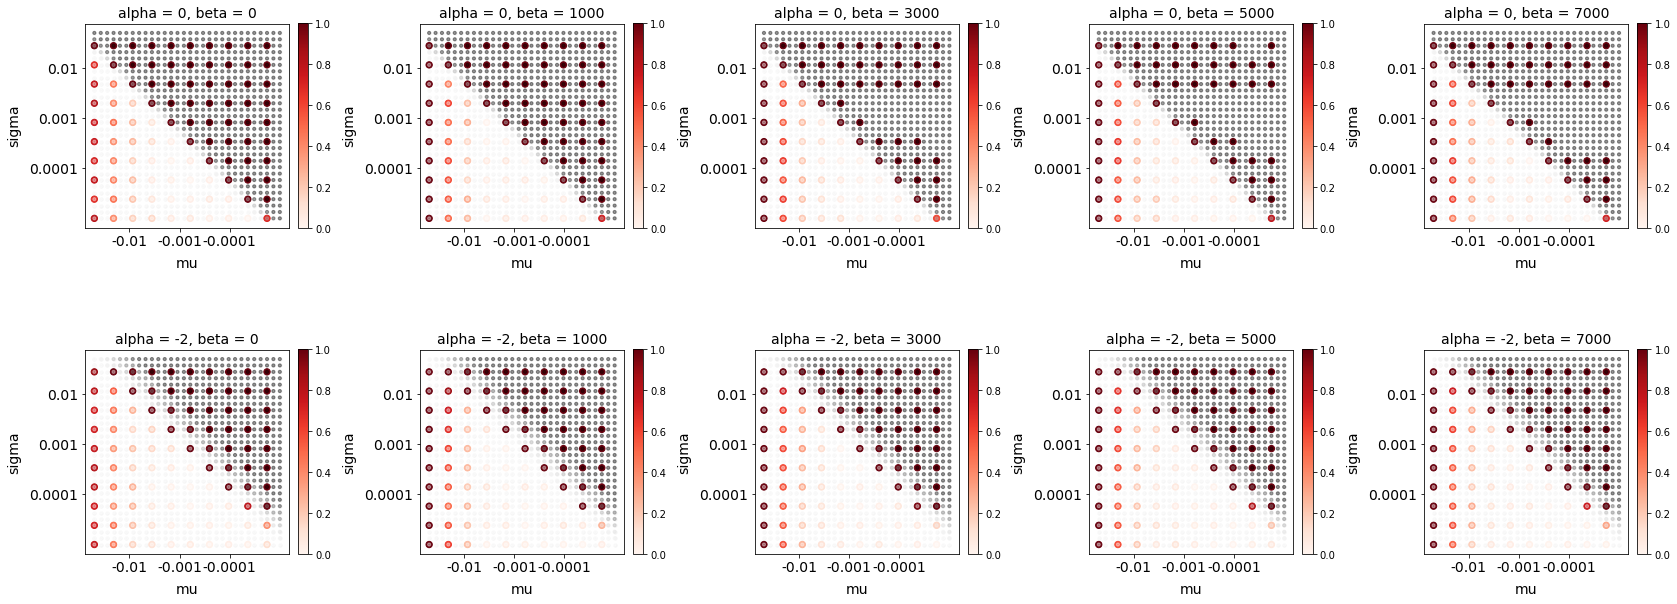

In [19]:
plt.figure(figsize=(28, 12))

plt.subplots_adjust(wspace=0.5, hspace=0)

for i in range(len(alpha_beta_reduced)):
    
    with open('out/rns_points_rns_pols_alpha=' + '{:.1f}'.format(float(alpha_beta_reduced[i].split()[0])) + '_beta=' + alpha_beta_reduced[i].split()[1] + '.txt') as f:
        lines = [x.replace('*10^', 'e').split() for x in f.readlines() if 'nan' not in x]
    
    mu_i = [-np.log(abs(float(x[0]))) for x in lines] # mu on log scale
    sigma_i = [np.log(float(x[1])) for x in lines] # sigma on log scale
    err_i = [abs(float(x[-1]) - rns_parsed_filtered_dict.get(' '.join(x[:-1]))) / rns_parsed_filtered_dict.get(' '.join(x[:-1])) for x in lines]
    # print(max(err_i))
    
    plt.subplot(len(alpha) - 1, len(beta), i + 1)

    # all points where Rai calculated hets
    plt.scatter([-np.log(abs(float(x.split()[0]))) for x in mu_sigma], [np.log(float(x.split()[1])) for x in mu_sigma], c='#f5f5f5', s=10)
    # points for which we have Fedya's code output
    plt.scatter(mu_i, sigma_i, c=err_i, cmap='Reds', norm = matplotlib.colors.Normalize(vmin=0, vmax=1), s=40)

    plt.colorbar(fraction=0.046, pad=0.04)
    
    if alpha_beta_reduced[i].split()[0] == '0':
        plt.scatter([-np.log(abs(float(x[0]))) for x in mu_sigma_area_0_0], [np.log(float(x[1])) for x in mu_sigma_area_0_0], c=[float(x[2]) for x in mu_sigma_area_0_0], cmap='Greys', norm = matplotlib.colors.Normalize(vmin=0, vmax=0.1), s=10, alpha=0.4)
    elif alpha_beta_reduced[i].split()[0] == '-2':
        plt.scatter([-np.log(abs(float(x[0]))) for x in mu_sigma_area_2_0], [np.log(float(x[1])) for x in mu_sigma_area_2_0], c=[float(x[2]) for x in mu_sigma_area_2_0], cmap='Greys', norm = matplotlib.colors.Normalize(vmin=0, vmax=0.1), s=10, alpha=0.4)
    
    plt.yticks([np.log(0.01), np.log(0.001), np.log(0.0001)], [0.01, 0.001, 0.0001], fontsize=14)
    plt.xticks([-np.log(abs(-0.01)), -np.log(abs(-0.001)), -np.log(abs(-0.0001))], [-0.01, -0.001, -0.0001], fontsize=14)

    plt.xlabel('mu', labelpad=8, fontsize=14);
    plt.ylabel('sigma', labelpad=8, fontsize=14);
    plt.title('alpha = ' + alpha_beta_reduced[i].split()[0] + ', beta = ' + alpha_beta_reduced[i].split()[1], fontsize=14)
    
    plt.gca().set_aspect('equal')

# plt.savefig('err_1_dfe_0.01_0.png', dpi=300, bbox_inches='tight')
# plt.savefig('err_1_dfe_0.1_0.png', dpi=300, bbox_inches='tight')



In [20]:
dfe_area_0_2N_keys == dfe_area_0_0_keys
dfe_area_0_0_2N_dict = dict(zip(dfe_area_0_0_keys, zip(dfe_area_0_0_values, dfe_area_0_2N_values)))

In [78]:
to_run = []
for alpha_area in [(mu_sigma_area_0_0, 0), (mu_sigma_area_2_0, -2), (mu_sigma_area_4_0, -4)]: 
    for i in range(len(alpha_area[0])):
        if alpha_area[0][i][-1] > 0.0 and ((alpha_area[0][i - 1][-1] == 0 and alpha_area[0][i][0] == alpha_area[0][i - 1][0]) or (alpha_area[0][i - 1][-1] != 0 and alpha_area[0][i][0] != alpha_area[0][i - 1][0])):
            mu_i = alpha_area[0][i][0]
            for j in range(-3, 26): # adding three points below the treshold + as many as I can fit up to 5% positive
                if alpha_area[0][i + j][0] == mu_i and alpha_area[0][i + j][-1] <= 0.05: # checking that we are in the same column and requiring less than 5% to be positive
                    if alpha_area[0][i + j][0] > -0.011 and alpha_area[0][i + j][1] < 0.011:
                        to_run.append([alpha_area[0][i + j][0], alpha_area[0][i + j][1], alpha_area[1], alpha_area[0][i + j][2]])

In [79]:
len(to_run)

406

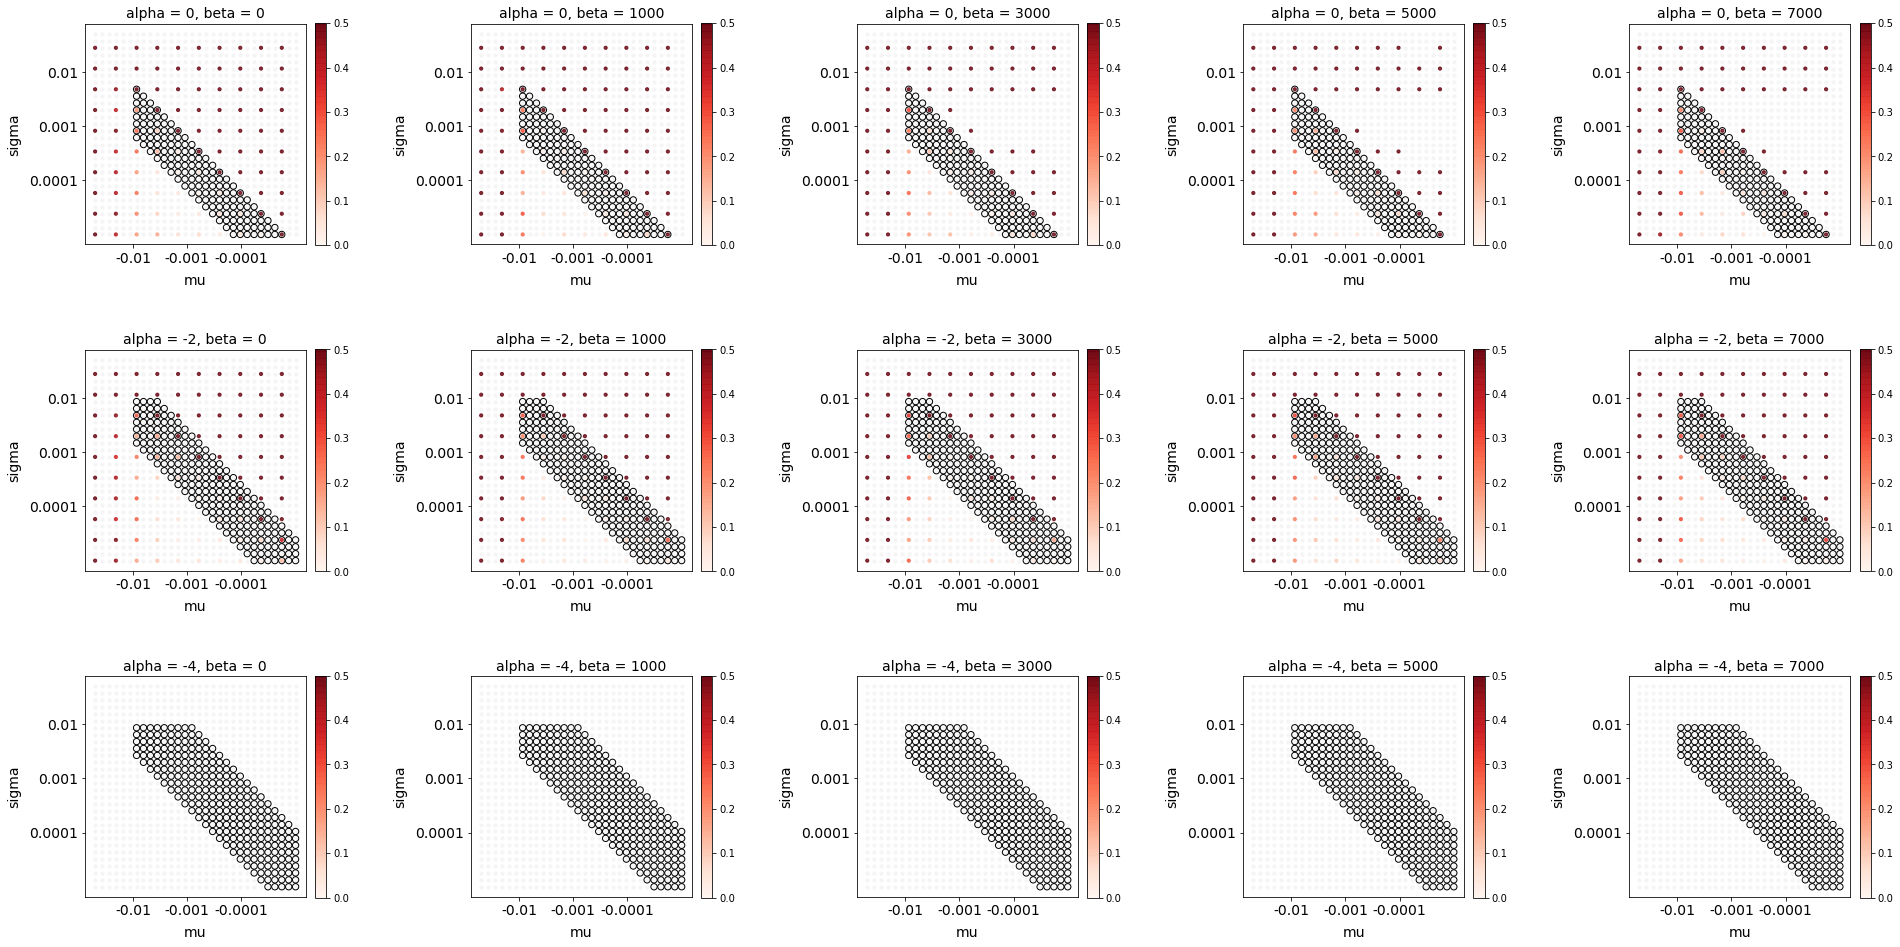

In [76]:
plt.figure(figsize=(32, 18))

plt.subplots_adjust(wspace=0.6, hspace=0)

for i in range(len(alpha_beta)):
    
    with open('out/rns_points_rns_pols_alpha=' + '{:.1f}'.format(float(alpha_beta[i].split()[0])) + '_beta=' + alpha_beta[i].split()[1] + '.txt') as f:
        lines = [x.replace('*10^', 'e').split() for x in f.readlines() if 'nan' not in x]
    
    mu_i = [-np.log(abs(float(x[0]))) for x in lines] # mu on log scale
    sigma_i = [np.log(float(x[1])) for x in lines] # sigma on log scale
    err_i = [abs(float(x[-1]) - rns_parsed_filtered_dict.get(' '.join(x[:-1]))) / rns_parsed_filtered_dict.get(' '.join(x[:-1])) for x in lines]
    # print(max(err_i))
    
    plt.subplot(len(alpha), len(beta), i + 1)

    # all points where Rai calculated hets
    plt.scatter([-np.log(abs(float(x.split()[0]))) for x in mu_sigma], [np.log(float(x.split()[1])) for x in mu_sigma], c='#f5f5f5', s=10)
    # points for which we have Fedya's code output
    plt.scatter(mu_i, sigma_i, c=err_i, cmap='Reds', norm = matplotlib.colors.Normalize(vmin=0, vmax=0.5), s=10, alpha=0.8)

    plt.colorbar(fraction=0.046, pad=0.04)
    
    if alpha_beta[i].split()[0] == '0':
        plt.scatter([-np.log(abs(float(x[0]))) for x in to_run if x[2] == 0], [np.log(float(x[1])) for x in to_run if x[2] == 0], facecolors='None', edgecolor='black', s=40)
    elif alpha_beta[i].split()[0] == '-2':
        plt.scatter([-np.log(abs(float(x[0]))) for x in to_run if x[2] == -2], [np.log(float(x[1])) for x in to_run if x[2] == -2], facecolors='None', edgecolor='black', s=40)
    elif alpha_beta[i].split()[0] == '-4':
        plt.scatter([-np.log(abs(float(x[0]))) for x in to_run if x[2] == -4], [np.log(float(x[1])) for x in to_run if x[2] == -4], facecolors='None', edgecolor='black', s=40)
        
    plt.yticks([np.log(0.01), np.log(0.001), np.log(0.0001)], [0.01, 0.001, 0.0001], fontsize=14)
    plt.xticks([-np.log(abs(-0.01)), -np.log(abs(-0.001)), -np.log(abs(-0.0001))], [-0.01, -0.001, -0.0001], fontsize=14)

    plt.xlabel('mu', labelpad=8, fontsize=14);
    plt.ylabel('sigma', labelpad=8, fontsize=14);
    plt.title('alpha = ' + alpha_beta[i].split()[0] + ', beta = ' + alpha_beta[i].split()[1], fontsize=14)
    
    plt.gca().set_aspect('equal')

# plt.savefig('to_run.png', dpi=300, bbox_inches='tight')
# plt.savefig('err_1_dfe_0.1_0.png', dpi=300, bbox_inches='tight')



In [24]:
to_run

[[-0.0085835287378376, 0.0014735393118657, 0, 0.0],
 [-0.0085835287378376, 0.0019765709878144, 0, 0.0],
 [-0.0085835287378376, 0.0026513258509018, 0, 0.0],
 [-0.0085835287378376, 0.003556426159747, 0, 0.01],
 [-0.0085835287378376, 0.0047705064337644, 0, 0.04],
 [-0.0063990451684807, 0.0010985277619675, 0, 0.0],
 [-0.0063990451684807, 0.0014735393118657, 0, 0.0],
 [-0.0063990451684807, 0.0019765709878144, 0, 0.0],
 [-0.0063990451684807, 0.0026513258509018, 0, 0.01],
 [-0.0063990451684807, 0.003556426159747, 0, 0.04],
 [-0.0047705064337644, 0.0008189555813651, 0, 0.0],
 [-0.0047705064337644, 0.0010985277619675, 0, 0.0],
 [-0.0047705064337644, 0.0014735393118657, 0, 0.0],
 [-0.0047705064337644, 0.0019765709878144, 0, 0.01],
 [-0.0047705064337644, 0.0026513258509018, 0, 0.04],
 [-0.003556426159747, 0.0006105337229237, 0, 0.0],
 [-0.003556426159747, 0.0008189555813651, 0, 0.0],
 [-0.003556426159747, 0.0010985277619675, 0, 0.0],
 [-0.003556426159747, 0.0014735393118657, 0, 0.01],
 [-0.003556

In [41]:
beta

[0, 1000, 3000, 5000, 7000]

In [45]:
# mu and sigma are x100 and b is x0.01 for the rns – now Fedya does this inside the code
to_run_rns_input = []
for i in beta:
    to_run_rns_input.extend([' ' + '{:.10f}'.format(x[0]) + # mu 
                             ' ' + '{:.10f}'.format(x[1]) + # sigma
                             ' ' + '{:.1f}'.format(x[2]) + 
                             ' ' + '{:.0f}'.format(i) + # beta
                             ' /nfs/scistore08/kondrgrp/alyulina/sandpiper/dynamics/h=sigm/ver22/pos/rns/RNSv22' + 
                             '_mu=' + '{:.10f}'.format(x[0]) + 
                             '_sigma=' + '{:.10f}'.format(x[1]) + 
                             '_alpha=' + '{:.1f}'.format(x[2]) + 
                             '_beta=' + '{:.0f}'.format(i) + 
                             '.txt\n' for x in to_run])

In [47]:
len(to_run_rns_input)

2030

In [49]:
! mkdir ../pos

In [73]:
# with open("/Users/alyulina/Projects/Kondrashov/Sandpiper/h=sigm/ver22/pos/RNS_input.txt", 'w+') as f:
#     f.writelines(to_run_rns_input)

In [27]:
! pwd
! ls ../pos

/Users/alyulina/Projects/Kondrashov/Sandpiper/h=sigm/ver22/Rai's
RNS_input.txt out           parse_outs.py


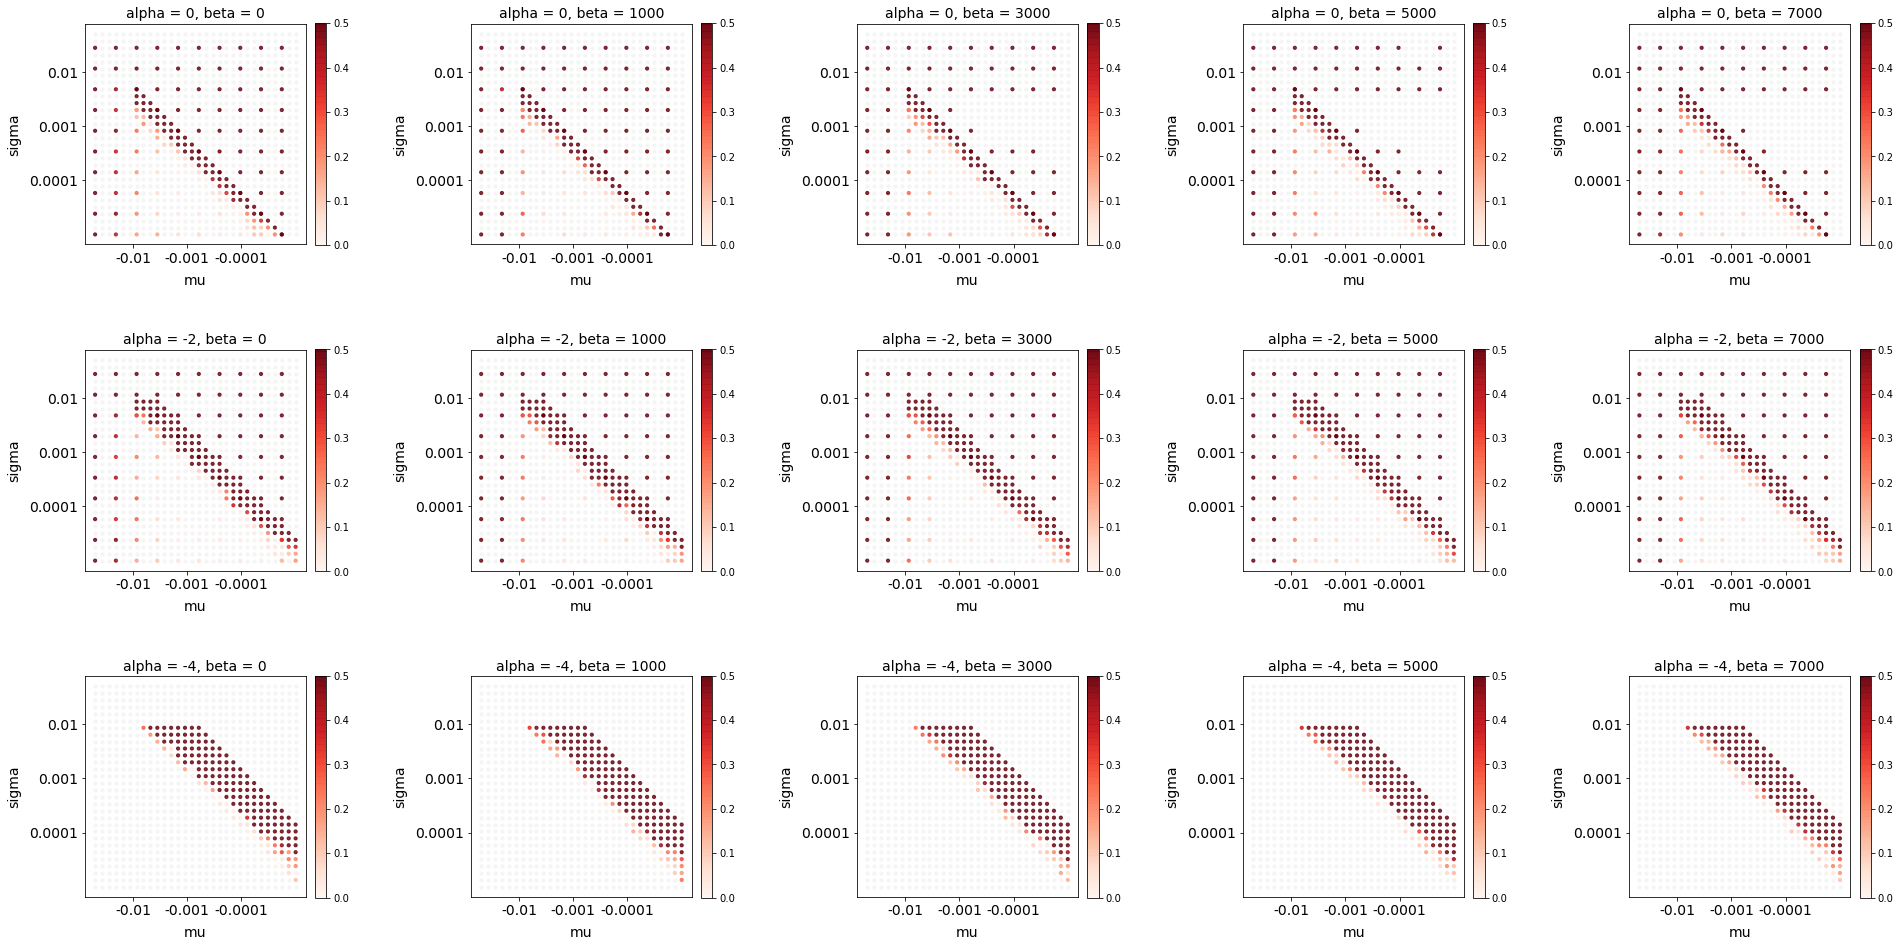

In [56]:
plt.figure(figsize=(32, 18))

plt.subplots_adjust(wspace=0.6, hspace=0)

for i in range(len(alpha_beta)):
    
    with open('out/rns_points_rns_pols_alpha=' + '{:.1f}'.format(float(alpha_beta[i].split()[0])) + '_beta=' + alpha_beta[i].split()[1] + '.txt') as f:
        lines = [x.replace('*10^', 'e').split() for x in f.readlines() if 'nan' not in x]
        
    with open('../pos/out/rns_points_rns_pols_alpha=' + '{:.1f}'.format(float(alpha_beta[i].split()[0])) + '_beta=' + alpha_beta[i].split()[1] + '.txt') as f:
        lines.extend([x.replace('*10^', 'e').split() for x in f.readlines() if 'nan' not in x])
    
    mu_i = [-np.log(abs(float(x[0]))) for x in lines] # mu on log scale
    sigma_i = [np.log(float(x[1])) for x in lines] # sigma on log scale
    err_i = [abs(float(x[-1]) - rns_parsed_dict.get(' '.join(x[:-1]))) / rns_parsed_dict.get(' '.join(x[:-1])) for x in lines]
    # print(max(err_i))
    
    plt.subplot(len(alpha), len(beta), i + 1)

    # all points where Rai calculated hets
    plt.scatter([-np.log(abs(float(x.split()[0]))) for x in mu_sigma], [np.log(float(x.split()[1])) for x in mu_sigma], c='#f5f5f5', s=10)
    # points for which we have Fedya's code output
    plt.scatter(mu_i, sigma_i, c=err_i, cmap='Reds', norm = matplotlib.colors.Normalize(vmin=0, vmax=0.5), s=10, alpha=0.8)

    plt.colorbar(fraction=0.046, pad=0.04)
    
    
    '''
    if alpha_beta[i].split()[0] == '0':
        plt.scatter([-np.log(abs(float(x[0]))) for x in to_run if x[2] == 0], [np.log(float(x[1])) for x in to_run if x[2] == 0], facecolors='None', edgecolor='black', s=40)
    elif alpha_beta[i].split()[0] == '-2':
        plt.scatter([-np.log(abs(float(x[0]))) for x in to_run if x[2] == -2], [np.log(float(x[1])) for x in to_run if x[2] == -2], facecolors='None', edgecolor='black', s=40)
    elif alpha_beta[i].split()[0] == '-4':
        plt.scatter([-np.log(abs(float(x[0]))) for x in to_run if x[2] == -4], [np.log(float(x[1])) for x in to_run if x[2] == -4], facecolors='None', edgecolor='black', s=40)
    '''
    
    plt.yticks([np.log(0.01), np.log(0.001), np.log(0.0001)], [0.01, 0.001, 0.0001], fontsize=14)
    plt.xticks([-np.log(abs(-0.01)), -np.log(abs(-0.001)), -np.log(abs(-0.0001))], [-0.01, -0.001, -0.0001], fontsize=14)

    plt.xlabel('mu', labelpad=8, fontsize=14);
    plt.ylabel('sigma', labelpad=8, fontsize=14);
    plt.title('alpha = ' + alpha_beta[i].split()[0] + ', beta = ' + alpha_beta[i].split()[1], fontsize=14)
    
    plt.gca().set_aspect('equal')

# plt.savefig('run.png', dpi=300, bbox_inches='tight')



In [69]:
to_use_rai = []
for alpha_area in [(mu_sigma_area_0_0, 0), (mu_sigma_area_2_0, -2), (mu_sigma_area_4_0, -4)]: 
    for i in range(len(alpha_area[0])):
        if alpha_area[0][i][-1] <= 0.000:
            if alpha_area[0][i][0] > -0.015 and alpha_area[0][i][1] < 0.015: # introducing mu and sigma cut-offs
                to_use_rai.append([alpha_area[0][i][0], alpha_area[0][i][1], alpha_area[1], alpha_area[0][i][2]])

In [83]:
to_run_2 = []
for alpha_area in [(mu_sigma_area_0_0, 0), (mu_sigma_area_2_0, -2), (mu_sigma_area_4_0, -4)]: 
    for i in range(len(alpha_area[0])):
        if alpha_area[0][i][-1] > 0.0 and ((alpha_area[0][i - 1][-1] == 0 and alpha_area[0][i][0] == alpha_area[0][i - 1][0]) or (alpha_area[0][i - 1][-1] != 0 and alpha_area[0][i][0] != alpha_area[0][i - 1][0])):
            mu_i = alpha_area[0][i][0]
            for j in range(-3, 26): # adding three points below the treshold + as many as I can fit up to 5% positive
                if alpha_area[0][i + j][0] == mu_i and alpha_area[0][i + j][-1] <= 0.05: # checking that we are in the same column and requiring less than 5% to be positive
                    if alpha_area[0][i + j][0] > -0.015 and alpha_area[0][i + j][1] < 0.015: # introducing mu and sigma cut-offs
                        if [alpha_area[0][i + j][0], alpha_area[0][i + j][1], alpha_area[1], alpha_area[0][i + j][2]] not in to_run: # checking that we have not not ran it already
                            to_run_2.append([alpha_area[0][i + j][0], alpha_area[0][i + j][1], alpha_area[1], alpha_area[0][i + j][2]])

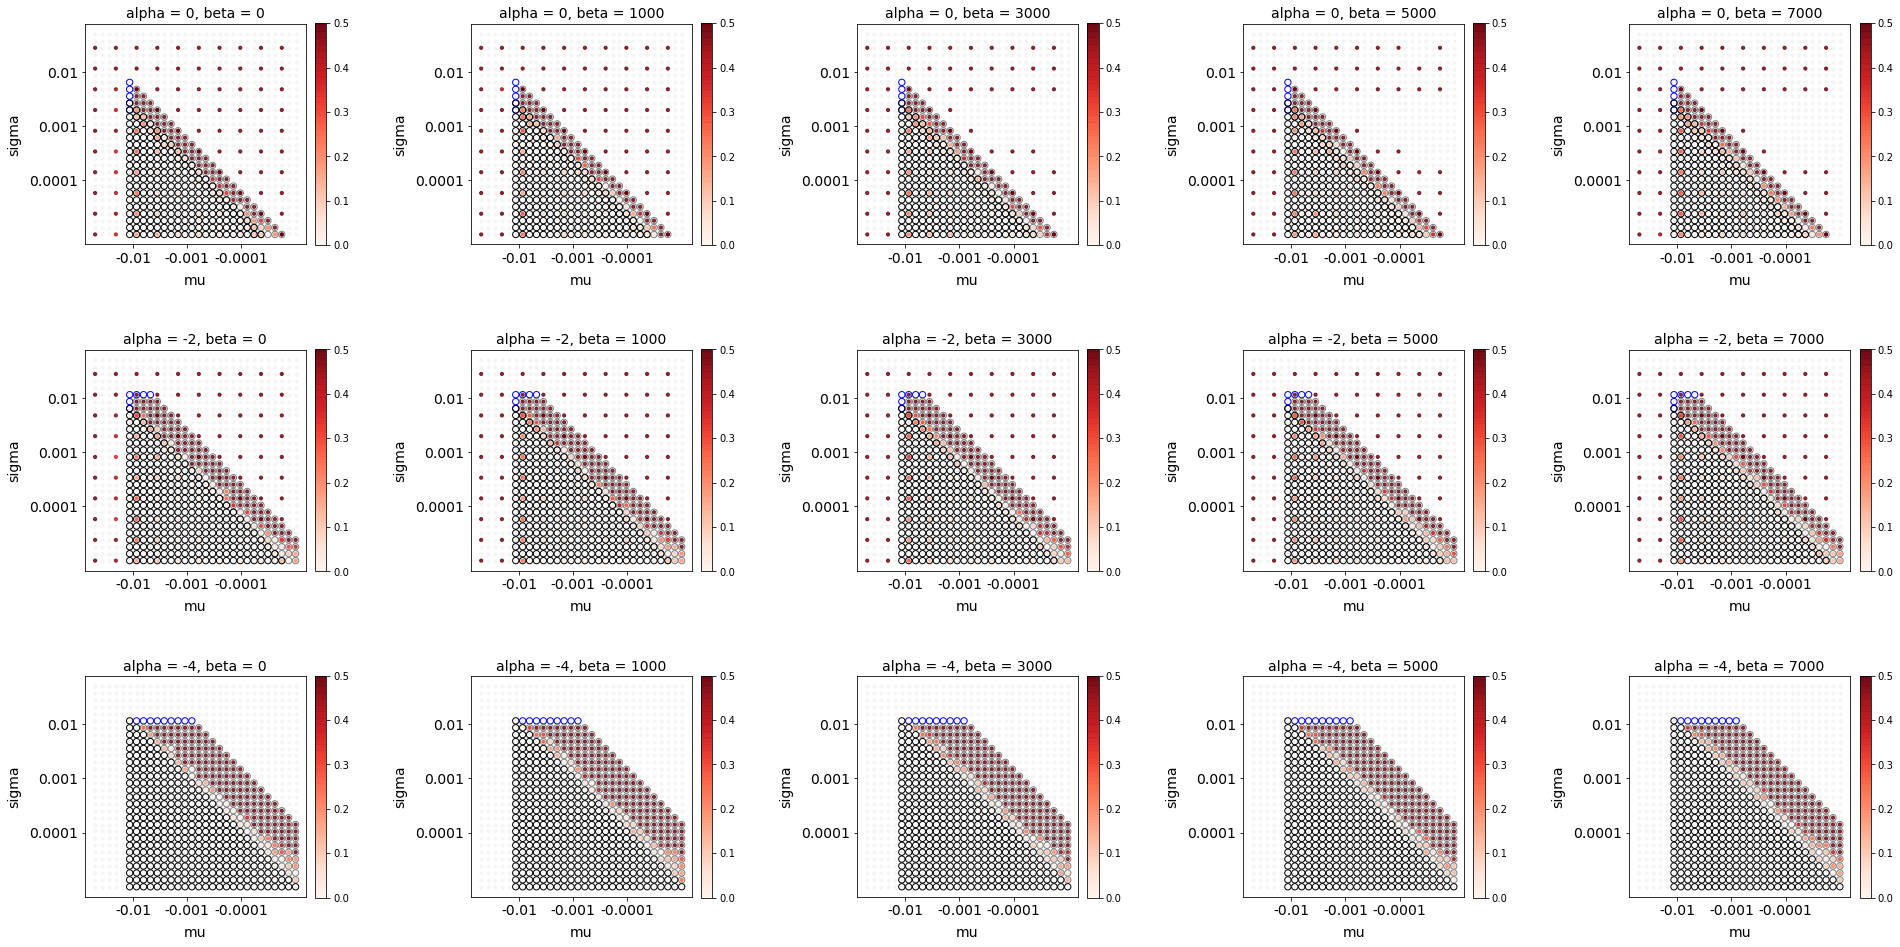

In [89]:
plt.figure(figsize=(32, 18))

plt.subplots_adjust(wspace=0.6, hspace=0)

for i in range(len(alpha_beta)):
    
    with open('out/rns_points_rns_pols_alpha=' + '{:.1f}'.format(float(alpha_beta[i].split()[0])) + '_beta=' + alpha_beta[i].split()[1] + '.txt') as f:
        lines = [x.replace('*10^', 'e').split() for x in f.readlines() if 'nan' not in x]
        
    with open('../pos/out/rns_points_rns_pols_alpha=' + '{:.1f}'.format(float(alpha_beta[i].split()[0])) + '_beta=' + alpha_beta[i].split()[1] + '.txt') as f:
        lines.extend([x.replace('*10^', 'e').split() for x in f.readlines() if 'nan' not in x])
    
    mu_i = [-np.log(abs(float(x[0]))) for x in lines] # mu on log scale
    sigma_i = [np.log(float(x[1])) for x in lines] # sigma on log scale
    err_i = [abs(float(x[-1]) - rns_parsed_dict.get(' '.join(x[:-1]))) / rns_parsed_dict.get(' '.join(x[:-1])) for x in lines]
    # print(max(err_i))
    
    plt.subplot(len(alpha), len(beta), i + 1)

    # all points where Rai calculated hets
    plt.scatter([-np.log(abs(float(x.split()[0]))) for x in mu_sigma], [np.log(float(x.split()[1])) for x in mu_sigma], c='#f5f5f5', s=10)
    # points for which we have Fedya's code output
    plt.scatter(mu_i, sigma_i, c=err_i, cmap='Reds', norm = matplotlib.colors.Normalize(vmin=0, vmax=0.5), s=10, alpha=0.8)

    plt.colorbar(fraction=0.046, pad=0.04)
    
    if alpha_beta[i].split()[0] == '0':
        plt.scatter([-np.log(abs(float(x[0]))) for x in to_run_2 if x[2] == 0], [np.log(float(x[1])) for x in to_run_2 if x[2] == 0], facecolors='None', edgecolor='blue', s=40)
    elif alpha_beta[i].split()[0] == '-2':
        plt.scatter([-np.log(abs(float(x[0]))) for x in to_run_2 if x[2] == -2], [np.log(float(x[1])) for x in to_run_2 if x[2] == -2], facecolors='None', edgecolor='blue', s=40)
    elif alpha_beta[i].split()[0] == '-4':
        plt.scatter([-np.log(abs(float(x[0]))) for x in to_run_2 if x[2] == -4], [np.log(float(x[1])) for x in to_run_2 if x[2] == -4], facecolors='None', edgecolor='blue', s=40)

    
    if alpha_beta[i].split()[0] == '0':
        plt.scatter([-np.log(abs(float(x[0]))) for x in to_run if x[2] == 0], [np.log(float(x[1])) for x in to_run if x[2] == 0], facecolors='None', edgecolor='grey', s=40)
    elif alpha_beta[i].split()[0] == '-2':
        plt.scatter([-np.log(abs(float(x[0]))) for x in to_run if x[2] == -2], [np.log(float(x[1])) for x in to_run if x[2] == -2], facecolors='None', edgecolor='grey', s=40)
    elif alpha_beta[i].split()[0] == '-4':
        plt.scatter([-np.log(abs(float(x[0]))) for x in to_run if x[2] == -4], [np.log(float(x[1])) for x in to_run if x[2] == -4], facecolors='None', edgecolor='grey', s=40)
    
    if alpha_beta[i].split()[0] == '0':
        plt.scatter([-np.log(abs(float(x[0]))) for x in to_use_rai if x[2] == 0], [np.log(float(x[1])) for x in to_use_rai if x[2] == 0], facecolors='None', edgecolor='black', s=40)
    elif alpha_beta[i].split()[0] == '-2':
        plt.scatter([-np.log(abs(float(x[0]))) for x in to_use_rai if x[2] == -2], [np.log(float(x[1])) for x in to_use_rai if x[2] == -2], facecolors='None', edgecolor='black', s=40)
    elif alpha_beta[i].split()[0] == '-4':
        plt.scatter([-np.log(abs(float(x[0]))) for x in to_use_rai if x[2] == -4], [np.log(float(x[1])) for x in to_use_rai if x[2] == -4], facecolors='None', edgecolor='black', s=40)
        
    
    plt.yticks([np.log(0.01), np.log(0.001), np.log(0.0001)], [0.01, 0.001, 0.0001], fontsize=14)
    plt.xticks([-np.log(abs(-0.01)), -np.log(abs(-0.001)), -np.log(abs(-0.0001))], [-0.01, -0.001, -0.0001], fontsize=14)

    plt.xlabel('mu', labelpad=8, fontsize=14);
    plt.ylabel('sigma', labelpad=8, fontsize=14);
    plt.title('alpha = ' + alpha_beta[i].split()[0] + ', beta = ' + alpha_beta[i].split()[1], fontsize=14)
    
    plt.gca().set_aspect('equal')

plt.savefig('all_points.png', dpi=300, bbox_inches='tight')



In [85]:
# mu and sigma are x100 and b is x0.01 for the rns – now Fedya does this inside the code
to_run_2_rns_input = []
for i in beta:
    to_run_2_rns_input.extend([' ' + '{:.10f}'.format(x[0]) + # mu 
                               ' ' + '{:.10f}'.format(x[1]) + # sigma
                               ' ' + '{:.1f}'.format(x[2]) + 
                               ' ' + '{:.0f}'.format(i) + # beta
                               ' /nfs/scistore08/kondrgrp/alyulina/sandpiper/dynamics/h=sigm/ver22/pos/rns/RNSv22' + 
                               '_mu=' + '{:.10f}'.format(x[0]) + 
                               '_sigma=' + '{:.10f}'.format(x[1]) + 
                               '_alpha=' + '{:.1f}'.format(x[2]) + 
                               '_beta=' + '{:.0f}'.format(i) + 
                               '.txt\n' for x in to_run_2])

In [86]:
# with open("/Users/alyulina/Projects/Kondrashov/Sandpiper/h=sigm/ver22/pos/RNS_input_2.txt", 'w+') as f:
#    f.writelines(to_run_2_rns_input)

In [90]:
# saving points to use with Rai's results
# with open('/Users/alyulina/Projects/Kondrashov/Sandpiper/h=sigm/ver22/points_to_use_rai.txt', 'w+') as o:
#     o.writelines(['{:.16f}'.format(x[0]) + ' ' + '{:.16f}'.format(x[1]) + ' ' + '{:.0f}'.format(x[2]) + '\n' for x in to_use_rai])

In [96]:
# saving points to use with Fedya's results
# with open('/Users/alyulina/Projects/Kondrashov/Sandpiper/h=sigm/ver22/points_to_use_fedya.txt', 'w+') as o:
#     o.writelines(['{:.16f}'.format(x[0]) + ' ' + '{:.16f}'.format(x[1]) + ' ' + '{:.0f}'.format(x[2]) + '\n' for x in to_run if x not in to_use_rai] + ['{:.16f}'.format(x[0]) + ' ' + '{:.16f}'.format(x[1]) + ' ' + '{:.0f}'.format(x[2]) + '\n' for x in to_run_2 if x not in to_use_rai])

In [101]:
# trying to learn how to interpolate in python
# maybe I should use grid interpolation?? or splines?

from scipy.interpolate import LinearNDInterpolator

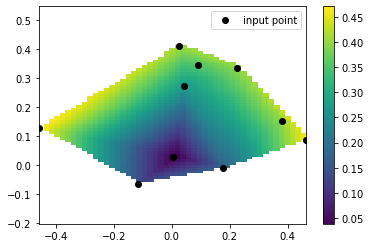

In [100]:
from scipy.interpolate import LinearNDInterpolator
import matplotlib.pyplot as plt
rng = np.random.default_rng()
x = rng.random(10) - 0.5
y = rng.random(10) - 0.5
z = np.hypot(x, y)
X = np.linspace(min(x), max(x))
Y = np.linspace(min(y), max(y))
X, Y = np.meshgrid(X, Y)  # 2D grid for interpolation
interp = LinearNDInterpolator(list(zip(x, y)), z)
Z = interp(X, Y)
plt.pcolormesh(X, Y, Z, shading='auto')
plt.plot(x, y, "ok", label="input point")
plt.legend()t
plt.colorbar()
plt.axis("equal")
plt.show()

In [99]:
list(zip(x, y)), z

([(-0.2967632276602227, -0.040343723037921775),
  (0.20916676500122144, -0.40501493018147183),
  (0.30343194686850483, -0.46852556811936374),
  (-0.33282742386318287, -0.4524243864788955),
  (-0.31376395891151987, 0.1464218398292486),
  (-0.06614229374916458, -0.05187981400115926),
  (0.031817038495040584, -0.03713191450493469),
  (0.2398150919119738, -0.1992988286953844),
  (-0.25253065322108625, -0.34670859857252956),
  (0.22241825947711547, -0.3224835380945832)],
 array([0.29949295, 0.4558375 , 0.55819992, 0.56165997, 0.34624728,
        0.08406139, 0.04889891, 0.31181934, 0.42892725, 0.39174675]))

In [169]:
# looking at a random trajectory to see if maybe it would make sense to average over more points

with open('../RNSv22_mu=-0.0035564262_sigma=0.0003393191_alpha=0.0_beta=0.txt') as f:
    lines = f.readlines()
    
last_t = [x for x in lines_rns if 'generation\t29999' in x]

[30001, 60005, 90009, 120013, 150017, 180021, 210025, 240029, 270033, 300037]

(0.0, 3e-05)

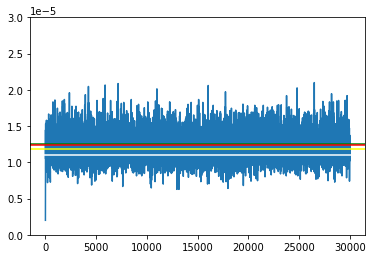

In [172]:
plt.plot([float(x.split()[1]) for x in lines[2:30002]], [float(x.split()[11]) for x in lines[2:30002]])
plt.axhline(float(lines[30001].split()[11]), color='white') # current
plt.axhline(np.mean([float(x.split()[11]) for x in lines[29002:30002]]), color='green') # avg over last 1,000 in one run
plt.axhline(1.2402526591999998e-05, color='red') # avg over 10,000
plt.axhline(np.mean([float(x.split()[11]) for x in [lines[i] for i in list(map(lines_rns.index, last_t))]]), color='yellow') # avg over all last ones
plt.ylim(0, 3e-5)

(29000.0, 30000.0)

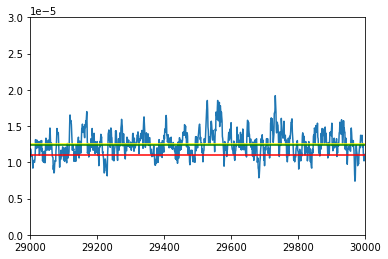

In [136]:
plt.plot([float(x.split()[1]) for x in lines[2:30002]], [float(x.split()[11]) for x in lines[2:30002]])
plt.axhline(float(lines[30001].split()[11]), color='red')
plt.axhline(np.mean([float(x.split()[11]) for x in lines[29002:30002]]), color='yellow')
plt.axhline(np.mean([float(x.split()[11]) for x in lines[29902:30002]]), color='green')
plt.ylim(0, 3e-5)
plt.xlim(29000, 30000)

In [134]:
len([float(x.split()[11]) for x in lines[29002:30002]])

1000

In [166]:
rns_params = [['mu=-0.0035564262', 'sigma=0.0003393191', 'alpha=0.0', 'beta=0']]

rns_pop_size = 5000

hets_rns = []; pols_rns = []

for p in rns_params:
    with open('../RNSv22_' + '_'.join(p) + '.txt') as f:
        lines_rns = f.readlines()
                    
        last_t = [x for x in lines_rns if 'generation\t29999' in x]
        # averaging over the last 1000 points
        ind = [item for sublist in [list(range(x + 1 - 1000, x + 1)) for x in list(map(lines_rns.index, last_t))] for item in sublist]
        many_t = [lines_rns[i] for i in ind]
        
        avg_het_2pq = np.mean([float(x.split()[11]) for x in many_t])                                   
        avg_dens = np.mean([(float(x.split()[9]) + 2 * float(x.split()[7])) for x in many_t]) / rns_pop_size # hetero + 2 * homo; this is normalized by genome size inside the program; needs to be normalized by population size though
                    
        hets_rns.append(' '.join(p).replace('=', ' ') + ' ' + str(avg_het_2pq).replace('e-', '*10^-') + '\n')
        pols_rns.append(' '.join(p).replace('=', ' ') + ' ' + str(avg_dens).replace('e-', '*10^-') + '\n')


In [167]:
avg_het_2pq

1.2402526591999998e-05